In [1]:
from synet.networks import HomogeneousNetwork
from synet.networks import merge_networks
from synet.networks import HeterogeneousNetwork
from synet.networks.random import random_network
from synet.measures import overlap_parameter, agent_entropy, mixing_entropy, path_entropy, paint_entropy
from synet.process.delay import DelayProcess
from synet.analysis import entropy_dt
import numpy as np
from collections import defaultdict
from matplotlib import pyplot as plt
from scipy.stats import spearmanr


In [2]:
n_networks = 100
n_process_sample = 100
n_events = 200
delay_process = DelayProcess()
max_dt = 100

In [3]:
all_delay_results = []
all_measure_results = defaultdict(lambda: [])
for _ in range(n_networks):
    net = random_network(n_events=n_events)
    for i in range(n_process_sample):
        res = delay_process.simulate(net)
        if i == 0:
            delay_result = res
        else:
            delay_result += res
    all_delay_results.append(delay_result/n_process_sample)

    for name, measure_f in measures.items():
        res = entropy_dt(net, max_dt=max_dt, entropy_game=measure_f)
        all_measure_results[name].append(res)
    


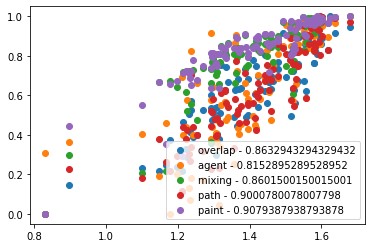

In [12]:
x_axis = [np.mean(r) for r in all_delay_results]
for measure_name, res in all_measure_results.items():
    y_res = np.array([np.mean(r) for r in res])
    y_res -= y_res.min()
    y_res /= y_res.max()
    cor = spearmanr(x_axis, y_res).correlation
    plt.scatter(x_axis, y_res, label=f"{measure_name} - {cor}")
plt.legend()
plt.show()

/home/qubix/.local/lib/python3.9/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


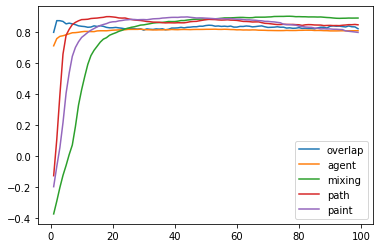

In [8]:
x_axis = [np.mean(r) for r in all_delay_results]
for measure_name, res in all_measure_results.items():
    all_cor = []
    y_vals_2 = None
    for i in range(len(res[0])):
        y_vals = np.array([r[i] for r in res])
        cor = spearmanr(x_axis, y_vals).correlation
        all_cor.append(cor)
    plt.plot(all_cor, label=f"{measure_name}")
plt.legend()
plt.show()